In [1]:
# SETUP

# Libraries
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# client location
client = bigquery.Client(location = "europe-north1")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: gentle-pier-291608


In [10]:
# Column names
query = """
    SELECT *
    FROM df.top1model
    LIMIT 2
"""
query_job = client.query(query, location= "europe-north1")  # API request - starts the query
top1 = query_job.to_dataframe()
cols = top1.columns
len(cols)

131

In [15]:
def create_dict_null(table, cols):
    nulls = {}
    for col in cols:
        query = """
            SELECT (COUNT(*) - COUNT("""+col+"""))/COUNT(*)
            FROM df."""+table+"""
            """
        query_job = client.query(query, location= "europe-north1")  # API request - starts the query
        x = query_job.to_dataframe().values
        x = x[0][0]
        nulls[col] = x
    return nulls

In [56]:
def select_columns(d):
    not_null_col = list()
    null_col = list()
    for key, value in d.items():
        if value < 0.5:
            not_null_col.append(key)
        else:
            null_col.append(key)
    return not_null_col, null_col

In [16]:
nulls1 = create_dict_null("top1model", cols)
nulls2 = create_dict_null("top2model", cols)
nulls3 = create_dict_null("top3model", cols)

In [57]:
select_cols1 = select_columns(nulls1)
not_null_cols_1 = select_cols1[0]
null_cols_1 = select_cols1[1]

select_cols2 = select_columns(nulls2)
not_null_cols_2 = select_cols2[0]
null_cols_3 = select_cols3[1]

select_cols3 = select_columns(nulls3)
not_null_cols_3 = select_cols3[0]
null_cols_2 = select_cols2[1]

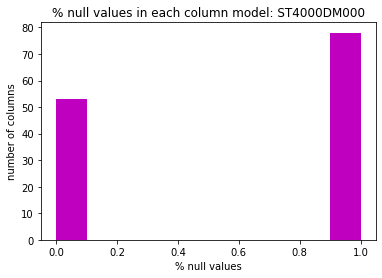

Number of columns with low % of null values: 53
Number of columns with high % of null values: 78


In [63]:
plt.hist(nulls1.values(), color = "m")
plt.xlabel('% null values')
plt.ylabel('number of columns')
plt.title('% null values in each column model: ST4000DM000')
plt.show()
print("Number of columns with low % of null values:", len(not_null_cols_1))
print("Number of columns with high % of null values:", len(null_cols_1))

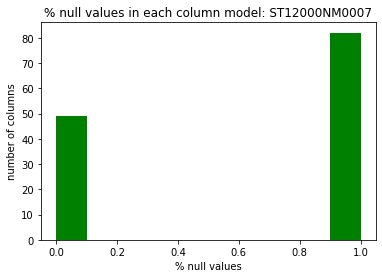

Number of columns with low % of null values: 49
Number of columns with high % of null values: 82


In [64]:
plt.hist(nulls2.values(), color = "g")
plt.xlabel('% null values')
plt.ylabel('number of columns')
plt.title('% null values in each column model: ST12000NM0007')
plt.show()
print("Number of columns with low % of null values:", len(not_null_cols_2))
print("Number of columns with high % of null values:", len(null_cols_2))

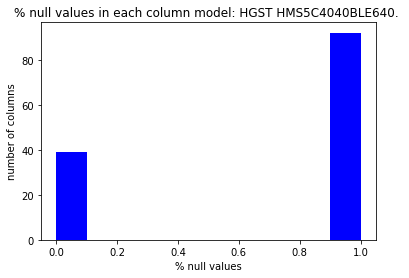

Number of columns with low % of null values: 39
Number of columns with high % of null values: 92


In [66]:
plt.hist(nulls3.values(), color = "b")
plt.xlabel('% null values')
plt.ylabel('number of columns')
plt.title('% null values in each column model: HGST HMS5C4040BLE640. ')
plt.show()
print("Number of columns with low % of null values:", len(not_null_cols_3))
print("Number of columns with high % of null values:", len(null_cols_3))